In [1]:
from sklearn import svm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
from sklearn.preprocessing import MinMaxScaler
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


In [7]:
from google.colab import files
uploaded = files.upload()


Saving bankloan.csv to bankloan.csv


In [8]:
import io
df = pd.read_csv(io.BytesIO(uploaded['bankloan.csv']))
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [9]:
df = df.dropna()
df.isna().any()
df = df.drop('Loan_ID', axis=1)
df['LoanAmount'] =(df['LoanAmount']*1000).astype(int)
Counter(df['Loan_Status'])#['Y']/df['Loan_Status'].size #Creates a dict


Counter({'N': 148, 'Y': 332})

In [10]:
pre_y = df['Loan_Status']
pre_X = df.drop('Loan_Status', axis=1)
dm_X=pd.get_dummies(pre_X) # Converts everything into 1's and 0's
dm_y=pre_y.map(dict(Y=1, N=0))
dm_X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,4583,1508.0,128000,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0
2,0.0,3000,0.0,66000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
3,0.0,2583,2358.0,120000,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1
4,0.0,6000,0.0,141000,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
5,2.0,5417,4196.0,267000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900,0.0,71000,360.0,1.0,1,0,1,0,1,0,1,0,1,0,0
610,3.0,4106,0.0,40000,180.0,1.0,0,1,0,1,1,0,1,0,1,0,0
611,1.0,8072,240.0,253000,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
612,2.0,7583,0.0,187000,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1


In [0]:
smote = SMOTE(ratio='minority') # SMOTE gets balance on imbalanced datasets
X1, y = smote.fit_sample(dm_X, dm_y)
scale= MinMaxScaler()
X = scale.fit_transform(X1)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42, shuffle=True) # Split data

In [13]:
classifier = Sequential()
classifier.add(Dense(200, activation='relu', kernel_initializer='random_normal', input_dim=X_test.shape[1]))
classifier.add(Dense(400, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])
classifier.fit(X_train, y_train, batch_size=20, epochs= 50, verbose=0)
eval_model = classifier.evaluate(X_train,y_train)
eval_model






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








531/531 [==============================] - 0s 85us/step


[0.3499718092367923, 0.8700564966138923]

In [0]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.52)

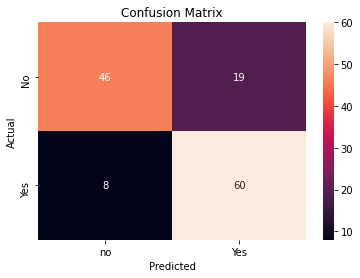

In [15]:
# Make a Confussion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax= ax,); #anot True to annotate cells

#Labels, title and ticks
ax.set_xlabel('Predicted');ax.set_ylabel('Actual');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['no', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

In [17]:
import pickle
from sklearn.externals import joblib
filename = 'loan_model.pkl'
joblib.dump(classifier, filename)


['loan_model.pkl']

In [23]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 0) 
csvscores  =[]
for train, test, in kfold.split(X,y):
  # Creates a model
  model = Sequential()
  model.add(Dense(200, activation='relu'))
  model.add(Dense(400, activation='relu'))
  model.add(Dense(4, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  # Compile model
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])
  # Fit the model
  model.fit(X[train], y[train], epochs= 100, verbose=0)
  # Evaluate model
  scores = model.evaluate(X[test], y[test], verbose=0)
  print('%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))
  csvscores.append(scores[1] * 100 )
print('%.2f%% (+/- %.2f%%)' % (np.mean(csvscores), np.std(csvscores)) )

ERROR! Session/line number was not unique in database. History logging moved to new session 59
acc: 79.28%
acc: 79.19%
acc: 73.30%
77.26% (+/- 2.80%)
